In [2]:
import torch
import torchvision
from torchvision import transforms
from torch import nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from typing import Type, Union, List, Optional

In [3]:
def load_img(img_path, img_size:List[int]=None, array=False, unsqueeze=True):
    """
    返回 1*C*H*W 的Tensor or Array形式圖片，預設返回的Tensor
    img_path: 圖片路徑
    img_size: 圖片大小(選填), Ex: [512, 512]...
    array: 是否返回np.array的格式
    unsqueeze: 是否返回1*C*H*W形式的圖片，預設為True
    """
    img = Image.open(img_path).convert('RGB')
    if img_size:
        img = img.resize(img_size)
    if array:
        img = np.array(img)
        if unsqueeze:
            img = img[None, :]
        return img
    else:
        transform = transforms.ToTensor()
        img = transform(img)
        if unsqueeze:
            img = img.unsqueeze(0)
        return img
    
def show_img(img, title=None, PIL=False):
    """
    img: Tensor or Array 形式
    title: 字串
    PIL: 受否返回PIL圖片，預設False
    """
    if torch.is_tensor(img):
        if img.ndim == 4:
            img = img.squeeze(0)  # 1*C*H*W --> C*H*W
        transform=transforms.ToPILImage()
        img = transform(img)
        if PIL:
            return img
        else:
            plt.imshow(img)
            if title:
                plt.title(title)
    else:  # np.array
        if img.ndim == 4:
            img = img.squeeze(0)
        if PIL:
            img = Image.fromarray(img)
            return img
        else:
            if title:
                plt.title(title)
            plt.imshow(img)
        
def ToArray(img):
    """
    Tensor圖片轉Array圖片
    """
    img_ = img.numpy()
    if img_.ndim == 4:
        img_ = np.transpose(img_, (0, 2, 3, 1))  # CHW --> HWC
    elif img_.ndim == 3:
        img_ = np.transpose(img_, (1, 2, 0))  # CHW --> HWC
    return img_

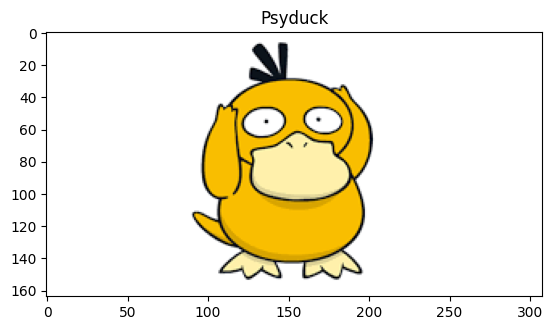

In [5]:
img_path = r"D:\python\Pytorch-Class\Lesson18\data\Images\Psyduck.png"
test_img = load_img(img_path)
show_img(test_img, title="Psyduck")

# 數據增強(Pytorch)

## Normalize

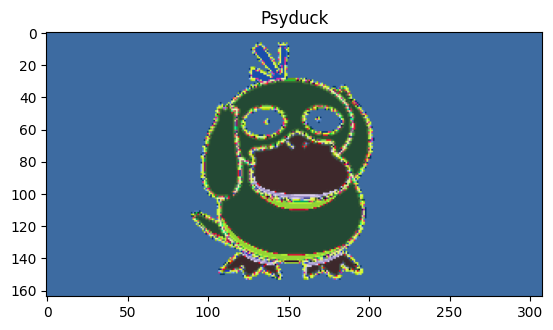

In [72]:
Normalize_ = transforms.Normalize(mean=[0.485, 0.456, 0.406] 
                                 , std=[0.229, 0.224, 0.225])
img_ = load_img(img_path)
img__ = Normalize_(img_)
show_img(img__, title="Psyduck")

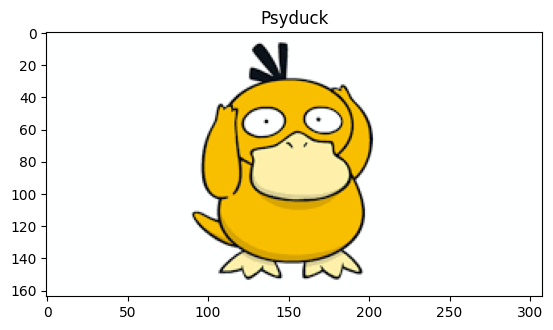

In [73]:
# De_Normalize
De_Normalize = transforms.Normalize(mean=[-2.12, -2.04, -1.80], std=[4.37, 4.46, 4.44])
img___ = De_Normalize(img__)
show_img(img___, title="Psyduck")

## Resize

torch.Size([1, 3, 164, 308])
torch.Size([1, 3, 256, 256])


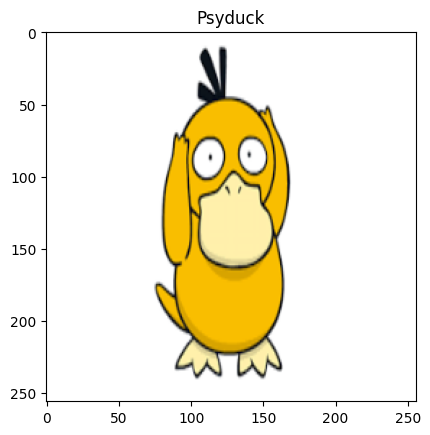

In [74]:
Resize_ = transforms.Resize([256, 256])  # 指定長寬
img_ = load_img(img_path)
print(img_.shape)
img__ = Resize_(img_)
print(img__.shape)
show_img(img__, title="Psyduck")

torch.Size([1, 3, 164, 308])
torch.Size([1, 3, 256, 480])


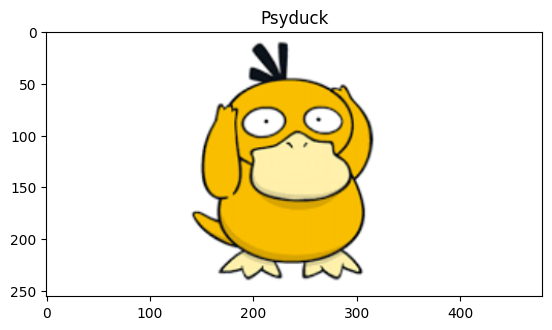

In [75]:
Resize_ = transforms.Resize(256)  # 指定H等比縮放
img_ = load_img(img_path)
print(img_.shape)
img__ = Resize_(img_)
print(img__.shape)
show_img(img__, title="Psyduck")

## CenterCrop

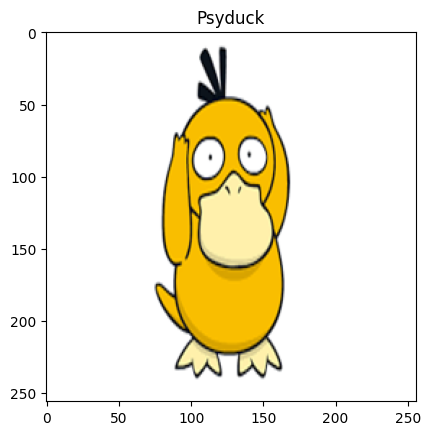

In [76]:
img_ = load_img(img_path, img_size=[256, 256])
show_img(img_, title="Psyduck")

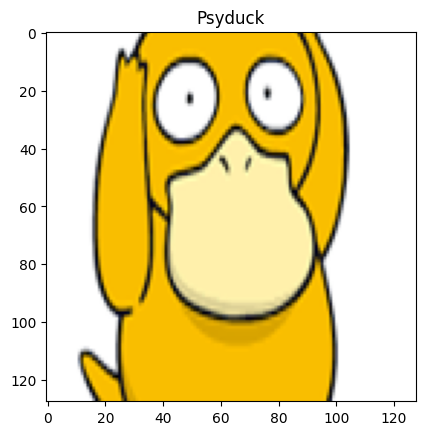

In [77]:
img_ = load_img(img_path, img_size=[256, 256])
CenterCrop_ = transforms.CenterCrop([128, 128])  # 中心裁減
img__ = CenterCrop_(img_)
show_img(img__, title="Psyduck")

## RandomCrop

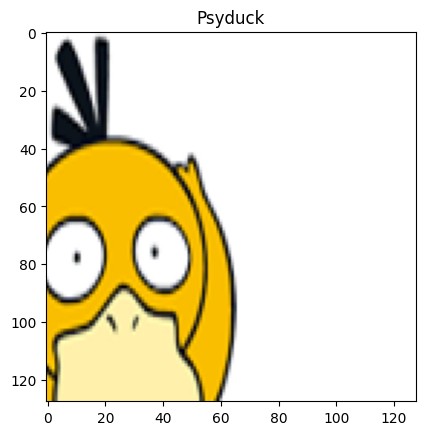

In [78]:
img_ = load_img(img_path, img_size=[256, 256])
RandomCrop_ = transforms.RandomCrop([128, 128])  # 隨機裁減
img__ = RandomCrop_(img_)
show_img(img__, title="Psyduck")

## Pad

torch.Size([1, 3, 376, 316])


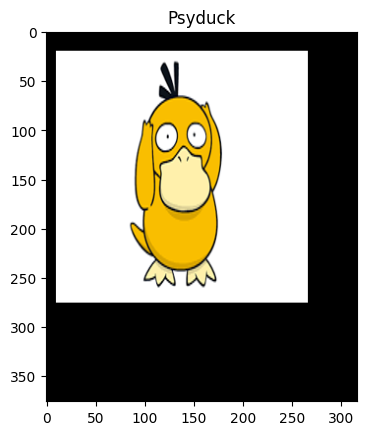

In [83]:
img_ = load_img(img_path, img_size=[256, 256])
Pad_ = transforms.Pad([10, 20, 50, 100])  # 分別代表四邊，圖像外圍增的加黑邊
img__ = Pad_(img_)
print(img__.shape)
show_img(img__, title="Psyduck")

## GaussianBlur

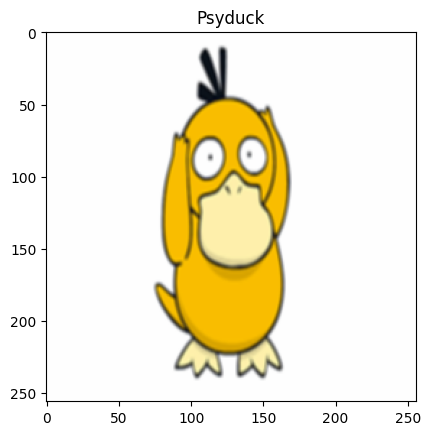

In [94]:
img_ = load_img(img_path, img_size=[256, 256])
GaussianBlur_ = transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 10.))  # sigma(min, max)
img__ = GaussianBlur_(img_)
show_img(img__, title="Psyduck")

## RandomAffine

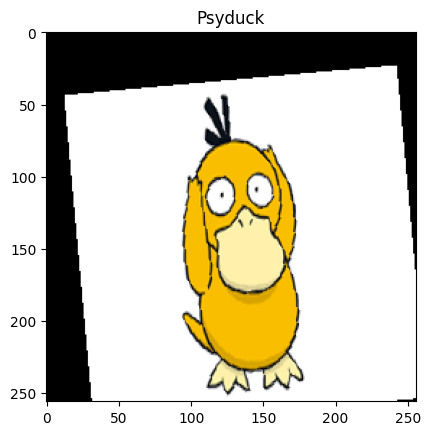

In [48]:
img_ = load_img(img_path, img_size=[256, 256])
RandomAffine_ = transforms.RandomAffine(degrees=(-15, 15)  # 旋轉角度 min ~ max
                                        , translate=(0.05, 0.1)  # 平移(水平, 垂直)
                                        , scale=(0.9, 1.1)  # 縮放(min, max)
                                        # , shear=(0, 10)  # 有點像是拉著圖片的角拉多少的感覺所以90就是都黑掉
                                       )  
img__ = RandomAffine_(img_)
show_img(img__, title="Psyduck")

## Grayscale 

torch.Size([1, 1, 256, 256])


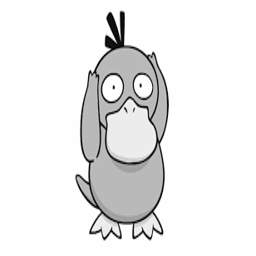

In [156]:
img_ = load_img(img_path, img_size=[256, 256])
Grayscale_ = transforms.Grayscale(num_output_channels=1) 
img__ = Grayscale_(img_)
print(img__.shape)
show_img(img__, PIL=True)

## RandomGrayscale 

torch.Size([1, 3, 256, 256])


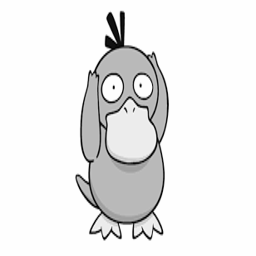

In [154]:
img_ = load_img(img_path, img_size=[256, 256])
RandomGrayscale_ = transforms.RandomGrayscale(p=0.5)  # p: 轉成灰階的機率
img__ = RandomGrayscale_(img_)
print(img__.shape)
show_img(img__, PIL=True)

##  RandomPerspective

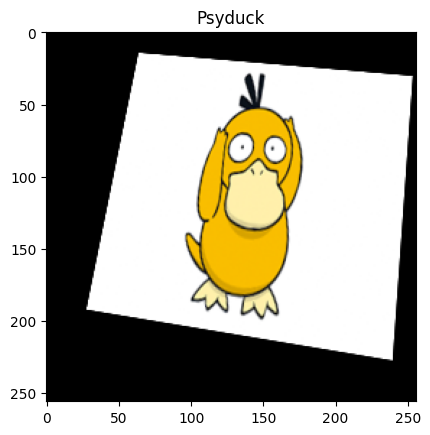

In [197]:
img_ = load_img(img_path, img_size=[256, 256])  # 隨機透視變化
RandomPerspective_ = transforms.RandomPerspective(distortion_scale=0.5, p=1)  
img__ = RandomPerspective_(img_)
show_img(img__, title="Psyduck")

## ColorJitter

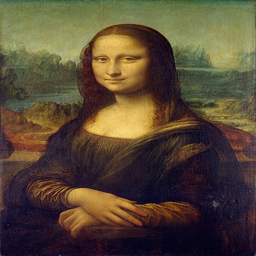

In [239]:
path = r"D:\python\Pytorch-Class\Lesson18\data\Images\Mona_Lisa.jpg"
img_ = load_img(path, img_size=[256, 256]) 
show_img(img_, PIL=True)

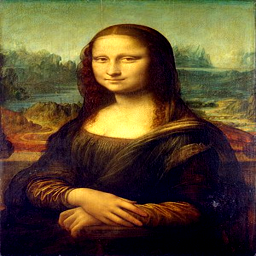

In [256]:
# 隨機變化的比例， Ex: 0.5就是變化50% --> 可能變成原圖的 50% ~ 150% 之間
ColorJitter_ = transforms.ColorJitter(brightness=0
                                      , contrast=0.5  # 增加對比度
                                      , saturation=0
                                      , hue=0
                                     )  
img__ = ColorJitter_(img_)
show_img(img__, PIL=True)

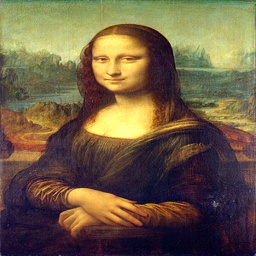

In [262]:
# 隨機變化的比例， Ex: 0.5就是變化50% --> 可能變成原圖的 50% ~ 150% 之間
ColorJitter_ = transforms.ColorJitter(brightness=0.5  # 增加亮度
                                      , contrast=0  # 增加對比度
                                      , saturation=0
                                      , hue=0
                                     )  
img__ = ColorJitter_(img_)
show_img(img__, PIL=True)

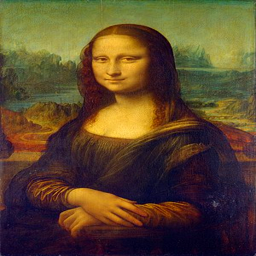

In [269]:
# 隨機變化的比例， Ex: 0.5就是變化50% --> 可能變成原圖的 50% ~ 150% 之間
ColorJitter_ = transforms.ColorJitter(brightness=0  # 增加亮度
                                      , contrast=0  # 增加對比度
                                      , saturation=0.5  # 增加飽和度
                                      , hue=0
                                     )  
img__ = ColorJitter_(img_)
show_img(img__, PIL=True)

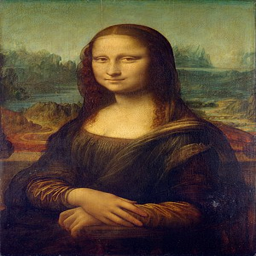

In [280]:
# 隨機變化的比例， Ex: 0.5就是變化50% --> 可能變成原圖的 50% ~ 150% 之間
ColorJitter_ = transforms.ColorJitter(brightness=0  # 增加亮度
                                      , contrast=0  # 增加對比度
                                      , saturation=0  # 增加飽和度
                                      , hue=(-0.3, 0.3)  # 色調
                                     )  
img__ = ColorJitter_(img_)
show_img(img__, PIL=True)

## transforms.RandomAdjustSharpness

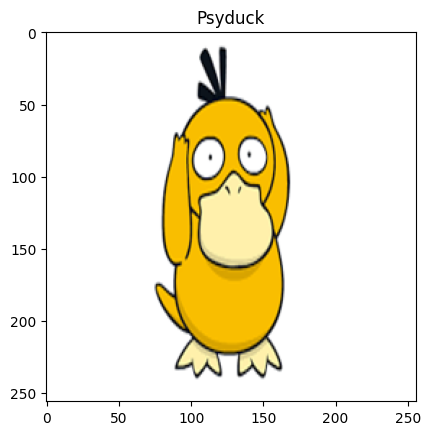

In [211]:
img_ = load_img(img_path, img_size=[256, 256]) 
show_img(img_, title="Psyduck")

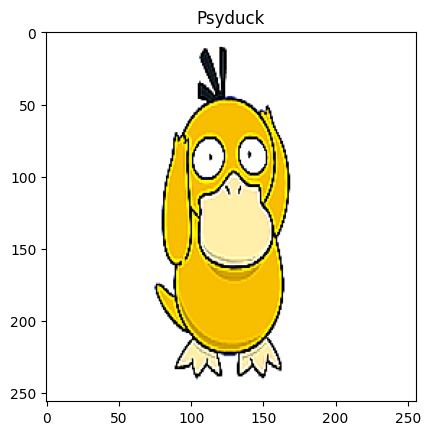

In [214]:
img_ = load_img(img_path, img_size=[256, 256]) 
RandomAdjustSharpness_ = transforms.RandomAdjustSharpness(sharpness_factor=10, p=1)
img__ = RandomAdjustSharpness_(img_)
show_img(img__, title="Psyduck")

## RandomRotation

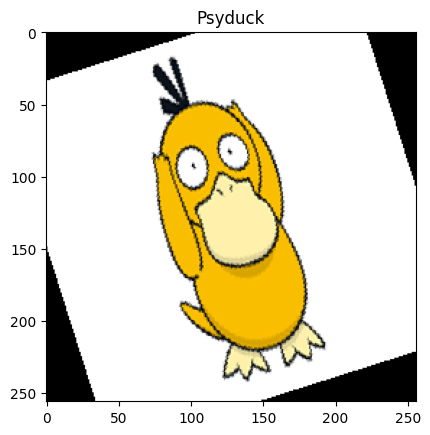

In [287]:
img_ = load_img(img_path, img_size=[256, 256]) 
RandomRotation_ = transforms.RandomRotation([-30, 30])
img__ = RandomRotation_(img_)
show_img(img__, title="Psyduck")

## RandomApply

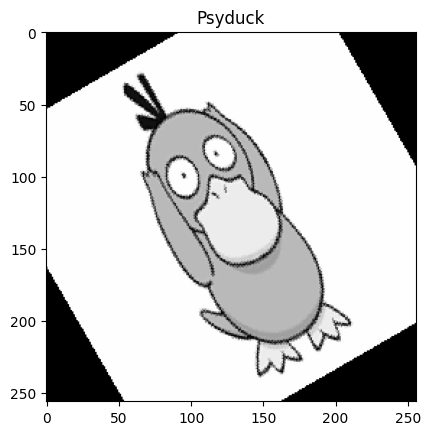

In [292]:
transforms_set = [transforms.RandomRotation([30, 30])
                 , transforms.Grayscale(num_output_channels=3)]
img_ = load_img(img_path, img_size=[256, 256]) 
RandomRotation_ = transforms.RandomApply(transforms_set, p=5)  # p:讓transforms_set執行的機率
img__ = RandomRotation_(img_)
show_img(img__, title="Psyduck")

## RandomChoice 

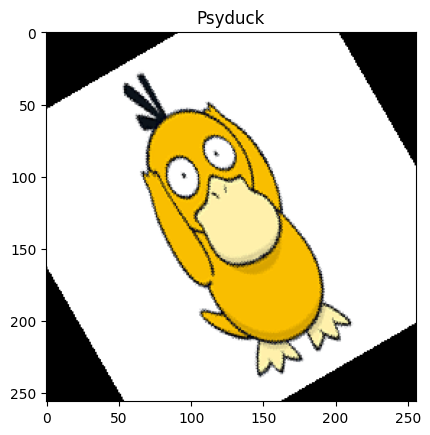

In [300]:
transforms_set = [transforms.RandomRotation([30, 30])
                 , transforms.Grayscale(num_output_channels=3)]
img_ = load_img(img_path, img_size=[256, 256]) 
RandomRotation_ = transforms.RandomChoice(transforms_set)  # transforms_set隨機選一個執行
img__ = RandomRotation_(img_)
show_img(img__, title="Psyduck")

## RandomOrder 

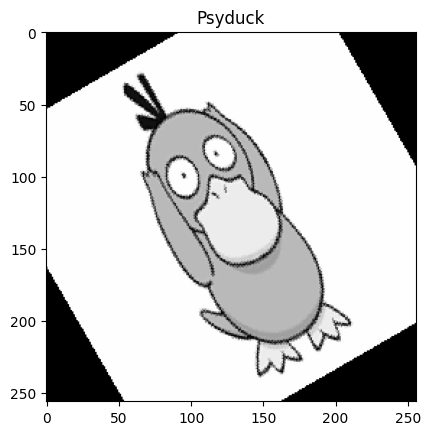

In [301]:
transforms_set = [transforms.RandomRotation([30, 30])
                 , transforms.Grayscale(num_output_channels=3)]
img_ = load_img(img_path, img_size=[256, 256]) 
RandomRotation_ = transforms.RandomOrder(transforms_set)  # transforms_set隨機改變順序執行
img__ = RandomRotation_(img_)
show_img(img__, title="Psyduck")

## Compose

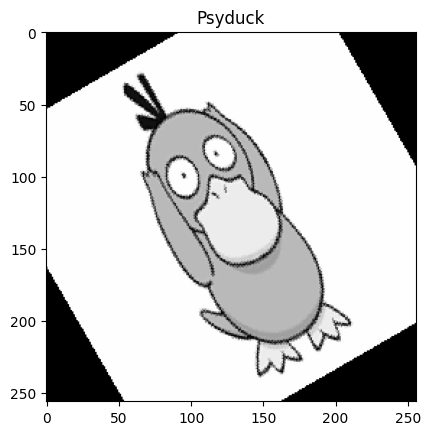

In [302]:
transforms_set = [transforms.RandomRotation([30, 30])
                 , transforms.Grayscale(num_output_channels=3)]
img_ = load_img(img_path, img_size=[256, 256]) 
RandomRotation_ = transforms.Compose(transforms_set)  # transforms_set按順序執行
img__ = RandomRotation_(img_)
show_img(img__, title="Psyduck")

# 數據增強(imgaug)

In [2]:
import imgaug as ia
from imgaug import augmenters as iaa
from skimage import io

In [202]:
def load_img(img_path, img_size:List[int]=None, array=False, unsqueeze=True):
    """
    返回 1*C*H*W 的Tensor or Array形式圖片，預設返回的Tensor
    img_path: 圖片路徑
    img_size: 圖片大小(選填), Ex: [512, 512]...
    array: 是否返回np.array的格式
    unsqueeze: 是否返回1*C*H*W形式的圖片，預設為True
    """
    img = Image.open(img_path).convert('RGB')
    if img_size:
        img = img.resize(img_size)
    if array:
        img = np.array(img)
        if unsqueeze:
            img = img[None, :]
        return img
    else:
        transform = transforms.ToTensor()
        img = transform(img)
        if unsqueeze:
            img = img.unsqueeze(0)
        return img
    
def show_img(img, title=None, PIL=False):
    """
    img: Tensor or Array 形式
    title: 字串
    PIL: 受否返回PIL圖片，預設False
    """
    if torch.is_tensor(img):
        if img.ndim == 4:
            img = img.squeeze(0)  # 1*C*H*W --> C*H*W
        transform=transforms.ToPILImage()
        img = transform(img)
        if PIL:
            return img
        else:
            plt.imshow(img)
            if title:
                plt.title(title)
    else:  # np.array
        if img.ndim == 4:
            img = img.squeeze(0)
        if PIL:
            img = Image.fromarray(img)
            return img
        else:
            if title:
                plt.title(title)
            plt.imshow(img)
        
def ToArray(img):
    """
    Tensor圖片轉Array圖片
    """
    img_ = img.numpy()
    if img_.ndim == 4:
        img_ = np.transpose(img_, (0, 2, 3, 1))  # CHW --> HWC
    elif img_.ndim == 3:
        img_ = np.transpose(img_, (1, 2, 0))  # CHW --> HWC
    return img_

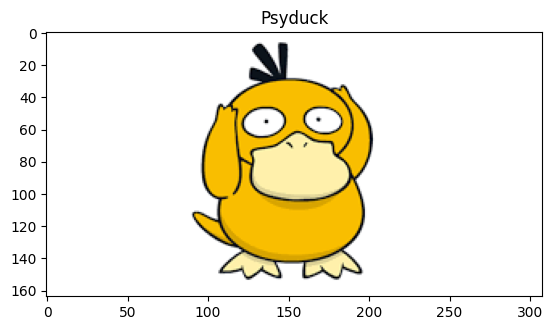

In [14]:
img_path = r"D:\python\Pytorch-Class\Lesson18\data\Images\Psyduck.png"
test_img = load_img(img_path, array=False)
img1 = show_img(test_img, title="Psyduck")

In [39]:
# 預設要對一個batch的圖片進行變化， .augment_image: 只變化一張圖片

## Affine

In [81]:
# 一般放在最後一個處理

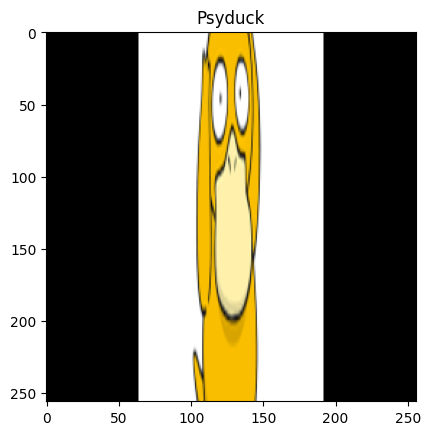

In [77]:
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
Affine_ = iaa.Affine(scale = {"x": (0.5,0.5), "y": (2,2)}  # 縮放比例
                     # , translate_percent={"x": (0.5, 0.5), "y": (0.5,0.5)}  # 移動比例
                    # , rotate=(25, 25)  # 旋轉角度(順時鐘): 負: 逆時鐘
                    # , shear=(-5, 5) # 透視角度: 拉伸圖像的一軸
                    ).augment_image 
img__ = Affine_(img_)
show_img(img__, title="Psyduck")

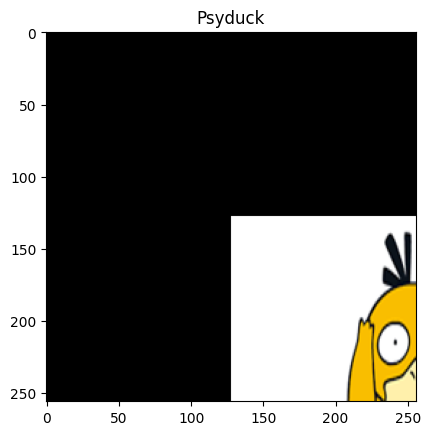

In [78]:
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
Affine_ = iaa.Affine(scale = {"x": (1,1), "y": (1,1)}  # 縮放比例
                     , translate_percent={"x": (0.5, 0.5), "y": (0.5,0.5)}  # 移動比例
                    # , rotate=(25, 25)  # 旋轉角度(順時鐘): 負: 逆時鐘
                    # , shear=(-5, 5) # 透視角度: 拉伸圖像的一軸
                    ).augment_image 
img__ = Affine_(img_)
show_img(img__, title="Psyduck")

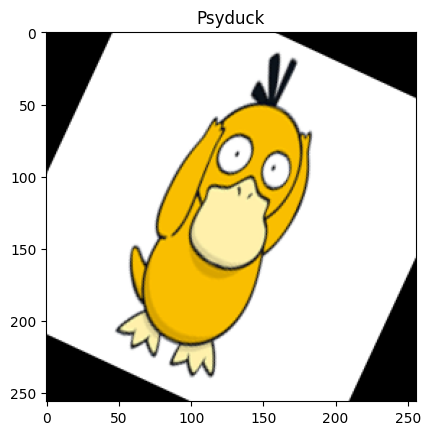

In [79]:
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
Affine_ = iaa.Affine(scale = {"x": (1,1), "y": (1,1)}  # 縮放比例
                     , translate_percent={"x": (0, 0), "y": (0,0)}  # 移動比例
                    , rotate=(25, 25)  # 旋轉角度(順時鐘): 負: 逆時鐘
                    # , shear=(-5, 5) # 透視角度: 拉伸圖像的一軸
                    ).augment_image 
img__ = Affine_(img_)
show_img(img__, title="Psyduck")

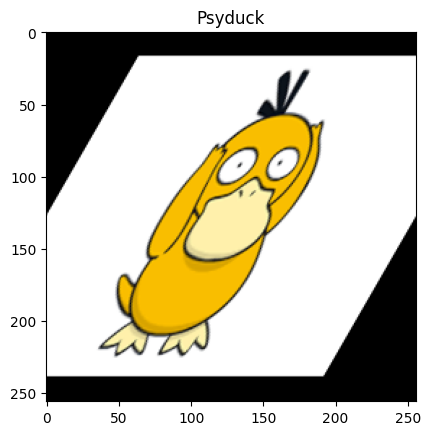

In [80]:
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
Affine_ = iaa.Affine(scale = {"x": (1,1), "y": (1,1)}  # 縮放比例
                     , translate_percent={"x": (0, 0), "y": (0,0)}  # 移動比例
                     , rotate=(0, 0)  # 旋轉角度(順時鐘): 負: 逆時鐘
                     , shear=30  # 透視角度: 拉伸圖像的一軸
                    ).augment_image  
img__ = Affine_(img_)
show_img(img__, title="Psyduck")

## AdditiveGaussianNoise

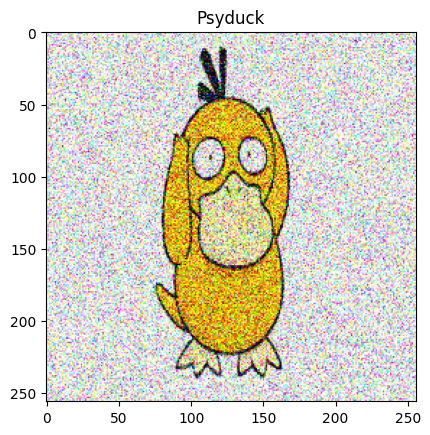

In [99]:
# 高斯噪聲 - 案高斯分布隨機抽取像素點變為噪聲
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
# 加上像素值，所以正值會越來越亮
# loc決定亮度，scale決定密集程度，若圖像先進行過歸一化則參數要改更小
AdditiveGaussianNoise_ = iaa.AdditiveGaussianNoise(loc=-10  # 高斯分布的均值，越大噪聲越多
                                                    , scale=(0.3*255, 0.3*255)  # 高斯分布的方差範圍，越大噪聲越多
                                                    , per_channel=True  # 每個通道分別添加噪聲 or 三通道一起添加
                                                   ).augment_image  
img__ = AdditiveGaussianNoise_(img_)
show_img(img__, title="Psyduck")

## MultiplyAndAddToBrightness

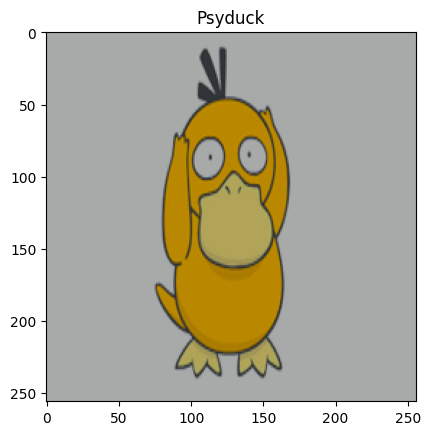

In [120]:
# 隨機亮度
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
MultiplyAndAddToBrightness_ = iaa.color.MultiplyAndAddToBrightness(mul=(0.5,0.5)  # 乘數
                                                                   ,add=(50,50)  # 加數
                                                                  ).augment_image  
img__ = MultiplyAndAddToBrightness_(img_)
show_img(img__, title="Psyduck")

## MultiplyHueAndSaturation

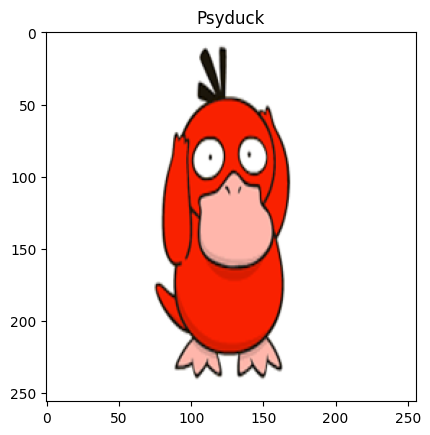

In [118]:
# 隨機色相飽和度
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
MultiplyAndAddToBrightness_ = iaa.MultiplyHueAndSaturation(mul_hue=(0.2,0.2)  # 色相
                                                           , mul_saturation=(1,1)  # 飽和度，更鮮豔or更黯淡
                                                          ).augment_image  
img__ = MultiplyAndAddToBrightness_(img_)
show_img(img__, title="Psyduck")

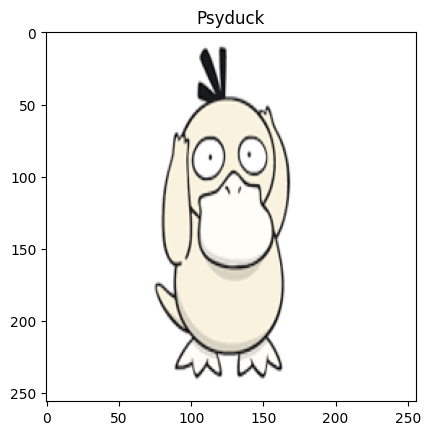

In [119]:
# 隨機色相飽和度
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
MultiplyAndAddToBrightness_ = iaa.MultiplyHueAndSaturation(mul_hue=(1,1)  # 色相
                                                           , mul_saturation=(0.1,0.1)  # 飽和度，更鮮豔or更黯淡
                                                          ).augment_image  
img__ = MultiplyAndAddToBrightness_(img_)
show_img(img__, title="Psyduck")

## EnhanceContrast

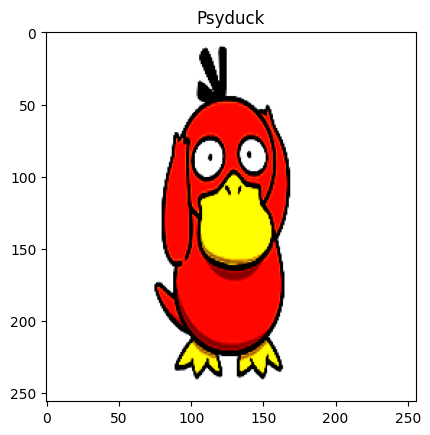

In [127]:
# 隨機對比度
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
# factor<1 :降低對比度，factor>1: 增加對比度
EnhanceContrast_ = iaa.pillike.EnhanceContrast(factor=(5,5)).augment_image
img__ = EnhanceContrast_(img_)
show_img(img__, title="Psyduck")

## ChangeColorTemperature

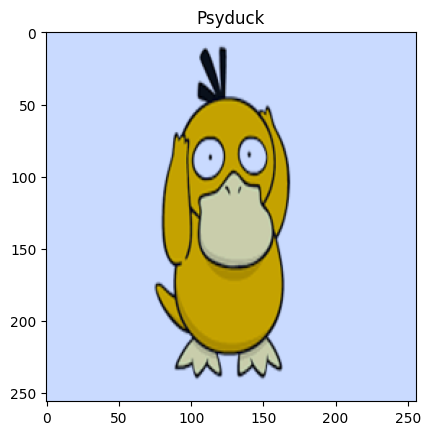

In [137]:
# 隨機色溫
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
ChangeColorTemperature_ = iaa.ChangeColorTemperature(kelvin=(10000,11000)).augment_image
img__ = ChangeColorTemperature_(img_)
show_img(img__, title="Psyduck")

## Equalize

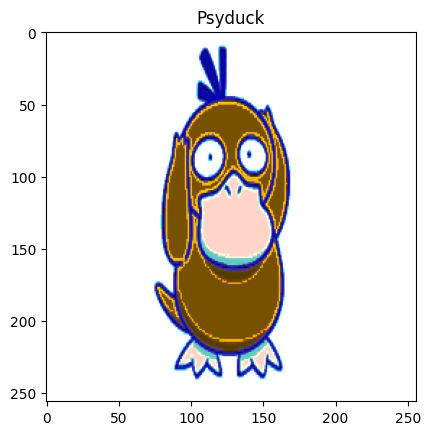

In [139]:
# 色彩均衡: 將圖像值方圖標準化為常態分布的操作
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
Equalize_ = iaa.pillike.Equalize().augment_image
img__ = Equalize_(img_)
show_img(img__, title="Psyduck")

## Fliplr

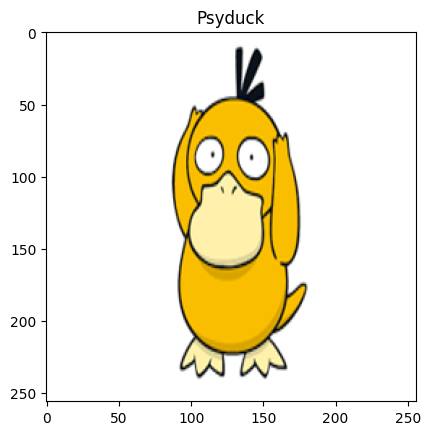

In [145]:
# 水平翻轉
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
Fliplr_ = iaa.Fliplr(p=1).augment_image
img__ = Fliplr_(img_)
show_img(img__, title="Psyduck")

## Flipud

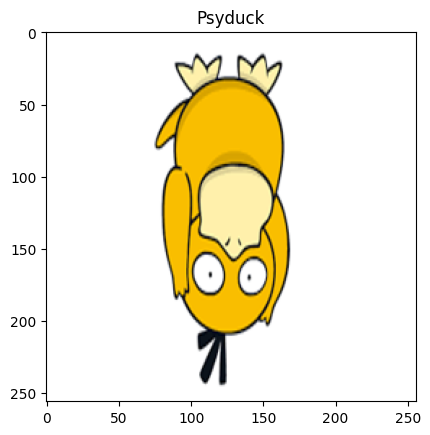

In [148]:
# 垂直翻轉
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
Flipud_ = iaa.Flipud(p=1).augment_image
img__ = Flipud_(img_)
show_img(img__, title="Psyduck")

## CropAndPad

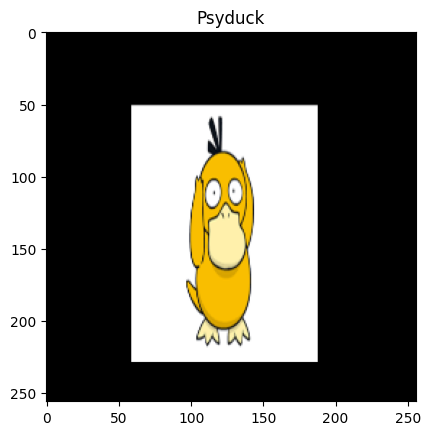

In [155]:
# 裁減填充
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
CropAndPad_ = iaa.CropAndPad(percent=(0.1,0.7)).augment_image
img__ = CropAndPad_(img_)
show_img(img__, title="Psyduck")

## ChangeColorspace

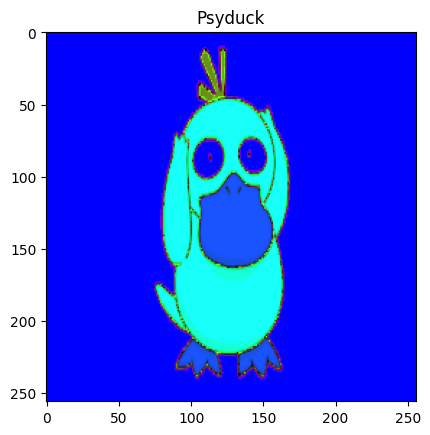

In [159]:
# 轉變色彩空間
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
ChangeColorspace_ = iaa.ChangeColorspace(to_colorspace="HSV").augment_image
img__ = ChangeColorspace_(img_)
show_img(img__, title="Psyduck")

## Sequential

In [ ]:
seq1 = iaa.Sequential([
    iaa.Resize(256), #放大尺寸
    iaa.Fliplr(0.5), #水平翻转
    iaa.Flipud(0.5), #竖直翻转
    iaa.Sometimes(0.5,iaa.AdditiveGaussianNoise(loc=1,scale=(0,0.05*255),per_channel=0.5)),
],random_order=True)

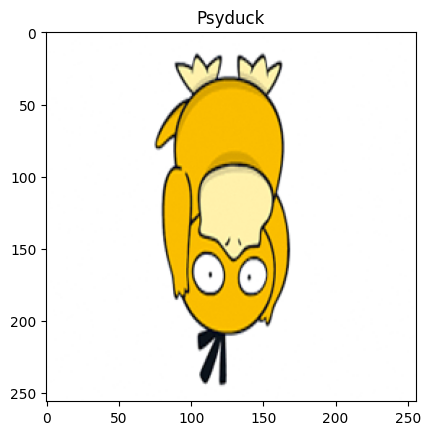

In [163]:
# 轉變色彩空間
seq1 = iaa.Sequential([
                       iaa.Resize(256)
                       , iaa.Fliplr(0.5)
                       , iaa.Flipud(0.5)
                       , iaa.pillike.EnhanceContrast(factor=(0.75,1.25))
                        # 案機率執行 
                       , iaa.Sometimes(0.5,iaa.AdditiveGaussianNoise(loc=1,scale=(0,0.05*255),per_channel=0.5))
                      ],random_order=True).augment_image


img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
img__ = seq1(img_)
show_img(img__, title="Psyduck")

# Pytorch + imgaug

In [ ]:
seq.augment_image >> 对单张图像进行处理
seq >> 对多张图像进行处理

Pytorch - 輸入是PIL，輸出也是PIL
imgaug - 輸入是ndarray，輸出也是ndarray
可用
ndarray --> imgaug --> transforms.ToPILImage() --> Pytorch --> transforms.ToTensor() or transforms.ToPILImage()

In [200]:
seq1 = [iaa.Resize(256).augment_image, 
        iaa.Fliplr(0.5).augment_image, 
        iaa.Flipud(0.5).augment_image, 
        iaa.Sometimes(0.5,iaa.AdditiveGaussianNoise(loc=-100,scale=(0.2*255,0.4*255),per_channel=0.5)).augment_image,
        # transforms.ToPILImage(), 
        transforms.ToTensor(),
        transforms.Pad([10, 10, 10, 10])]

torch.Size([3, 276, 276])


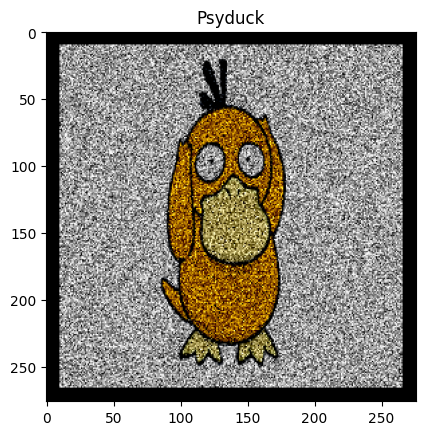

In [201]:
seq1_ = transforms.Compose(seq1)
img_ = load_img(img_path, img_size=[256, 256], array=True, unsqueeze=False) 
img__ = seq1_(img_)
print(img__.shape)
show_img(img__, title="Psyduck")